In [1]:
from __future__ import print_function

import os
os.chdir('C:/Users/SWC/Desktop/cell_detection')

import matplotlib.pyplot as pl
import pyqtgraph as pg
import matplotlib as mpl
import seaborn as sns
import numpy as np
from imp import reload
from glob import glob
import os, sys, re
import cv2
from PyQt5 import QtCore
import pandas as pd
from imageio import imwrite

np.set_printoptions(precision=3, suppress=1)
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})
#%matplotlib inline
#%gui qt
## import our modules
from MyImageViewer import MyImageViewer as im
from MyCellDetector import MyCellDetector as mcd
import time
start = time.time()
from MyImageViewer import MyImageViewer as im
from MyCellDetector import MyCellDetector as mcd

C:\Users\SWC\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [249]:
def rload(module):
    reload(sys.modules[module.__name__])
def scale(im):
    max_ = im.max()
    return (im/max_*255).astype('uint8')

def saturate(frame, max_ = 1):
    fr = frame.copy()
    fr[fr>max_] = max_
    return fr.astype('uint8')

def write2im(im, text):
    im_wText = cv2.putText(im.swapaxes(0,1).copy(),text,\
            (10,100), cv2.FONT_HERSHEY_DUPLEX, 2, (255, 255, 255), 2)
    return im_wText.swapaxes(0,1)

def invert(frame):
    return 255-frame

def day_finder(folder_loc, experiment, virus, days):
    day_find1 = glob (folder_loc + '/' + experiment + '/' + virus +'/')
    day_find2 = glob(day_find1[0]+'/*/')    
    for ii in range(len(day_find2)):
            first_split = re.split(r'/', day_find2[ii])
            second_split = re.split(r'_', first_split[9])
           #print(second_split)
            third_split = second_split[1].replace(month, '')
            print(third_split)
            days.append(third_split)
            
def get_exp_params(original_path):
    name_n_ext = re.split(r'\.', original_path)
    tmp = re.split('_', name_n_ext[-2])
#     print(tmp)
    # tmp = ['/20180321/ST', '20180321', 'I', 'B19', 'Evos4x', 'G06', '4', 'RFP']
    im = tmp[-2]
    row = tmp[-3][0]
    exp = tmp[-3][1:]
    return row, exp, im

def image_finder(file_paths,image_name):
    for iii in range(len(file_paths)):
        first_file_split = re.split(r'\\', file_paths[iii])
        second_file_split = first_file_split[1]
        image_name.append(second_file_split)
    return image_name


def image_labeller(image_name, kptss, image, image_folder):
      for iiii in range(len(image_name)):
        text =  "# cells: {}".format(len(kptss[iiii]))
        imagey = cv2.putText(pics[iiii], text, text_loc, font, fontscale, fontcolor, linetype)
        imwrite(image_folder +  image_name[iiii] ,imagey)

def csv_finder(directory, extension):
    csv_step_1 = glob(directory + '/' + '*' +'/')
    for i5 in range(len(csv_step_1)):
        csv_directory = glob(csv_step_1[i5] + extension)  
        csv_directory_list[i5] = (csv_directory[0])
        

In [317]:
folder_loc = 'C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data'
experiment = 'HSV Rabies/HSV_HEK_Transfection_1_Mar2018'
virus = 'N2c'
file_type = '_I_'
month = '201803'
experiment_type = 'HSVRepeat_EVOS4x'
condition_list =('US7','US8','US9','US7+8','US7+9','US8+9','US7+8+9','GFP','N2cG')
group1=['B', 'C', 'D']     


days = []

day_finder(folder_loc, experiment, virus, days)



18
20
22
24
26
28


working folder: C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_1_Mar2018/N2c/ST_20180318_I_N2c_HSVRepeat_EVOS4x 
saving to: C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_1_Mar2018/results/N2c/20180318_I_N2c_HSVRepeat_EVOS4x/
number of images to process: 324
number of images to process: 324
99th percentile: 4.0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 1
# keypoint detected: 1
# keypoint detected: 0
# keypoint detected: 1
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 5
# keypoint detected: 4
# keypoint detected: 3
# keypoint detected: 7
# keypoint detected: 7
# keypoint detected: 2
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoin

C:\Users\SWC\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


   condition  group  wellsummean  wellsumstd  wellsumrange  wellsumsum
0         02      0     2.666667    1.699673           4.0         8.0
2         03      0     0.666667    0.471405           1.0         2.0
4         04      0    29.666667   11.897712          29.0        89.0
6         05      0     0.000000    0.000000           0.0         0.0
8         06      0     0.000000    0.000000           0.0         0.0
10        07      0     0.333333    0.471405           1.0         1.0
12        08      0     0.333333    0.471405           1.0         1.0
14        09      0   182.000000  128.322510         290.0       546.0
16        10      0     4.333333    4.784233          11.0        13.0
working folder: C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_1_Mar2018/N2c/ST_20180320_I_N2c_HSVRepeat_EVOS4x 
saving to: C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_1_Mar2018/results/N2c/20180320_I_N2c_HS

# keypoint detected: 2
# keypoint detected: 1
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 62
# keypoint detected: 80
# keypoint detected: 51
# keypoint detected: 60
# keypoint detected: 27
# keypoint detected: 46
# keypoint detected: 27
# keypoint detected: 73
# keypoint detected: 13
# keypoint detected: 13
# keypoint detected: 9
# keypoint detected: 18
   condition  group  wellsummean  wellsumstd  wellsumrange  wellsumsum
0         02      0    17.333333    3.771236           8.0        52.0
2         03      0    10.666667    5.792716          14.0        32.0
4         04      0   118.000000   43.228077          95.0       354.0
6         05      0     6.333333    5.792716          14.0        19.0
8         06      0     7.000000    2.943920           7.0        21.0
10        07      0     0.333333    0.471405           1.0         1.0
12        08      0     0.666667    0.942809           2.0         2.0
14        09      0   177.666667  126.325857         

# keypoint detected: 2
# keypoint detected: 2
# keypoint detected: 29
# keypoint detected: 43
# keypoint detected: 24
# keypoint detected: 23
# keypoint detected: 15
# keypoint detected: 20
# keypoint detected: 27
# keypoint detected: 9
# keypoint detected: 15
# keypoint detected: 3
# keypoint detected: 4
# keypoint detected: 5
# keypoint detected: 34
# keypoint detected: 17
# keypoint detected: 3
# keypoint detected: 2
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 69
# keypoint detected: 67
# keypoint detected: 59
# keypoint detected: 25
# keypoint detected: 52
# keypoint detected: 40
# keypoint detected: 12
# keypoint detected: 52
# keypoint detected: 5
# keypoint detected: 8
# keypoint detected: 22
# keypoint detected: 35
   condition  group  wellsummean  wellsumstd  wellsumrange  wellsumsum
0         02      0    19.333333    9.104334          21.0        58.0
2         03      0    13.333333    5.436502          13.0        40.0
4         04      0    59.66666

# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint 

# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint 

# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 0
# keypoint detected: 576
# keypoint detected: 378
# keypoint detected: 693
# keypoint detected: 477
# keypoint detected: 272
# keypoint detected: 222
# keypoint detected: 473
# keypoint detected: 360
# keypoint detected: 820
# keypoint detected: 389
# keypoint detected: 192
# keypoint detected: 158
# keypoint detected: 387
# keypoint detected: 408
# keypoint detected: 449
# keypoint detected: 554
# keypoint detected: 247


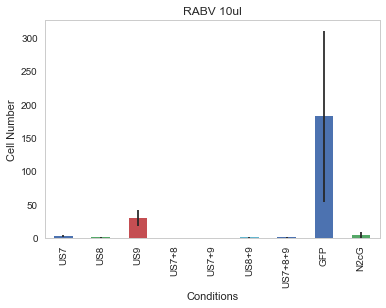

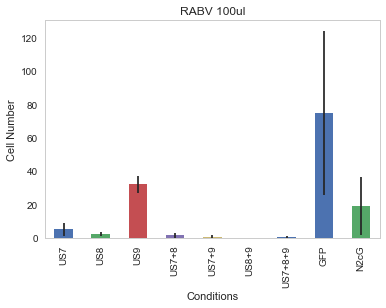

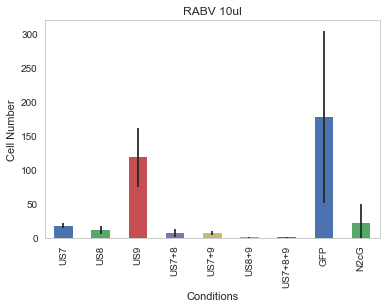

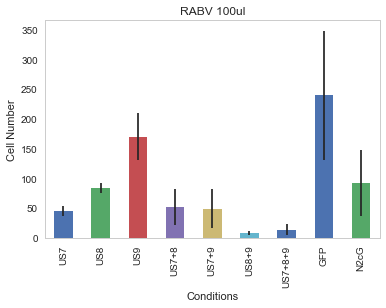

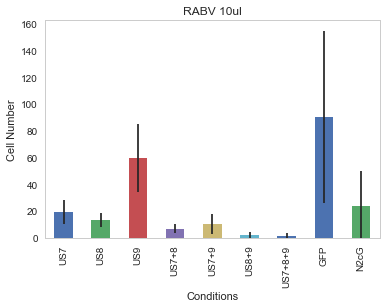

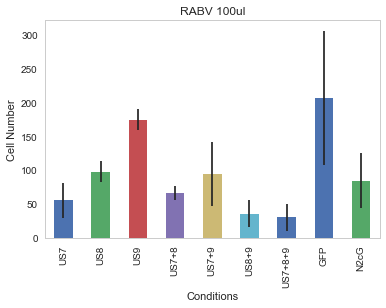

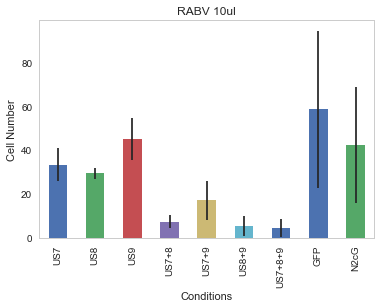

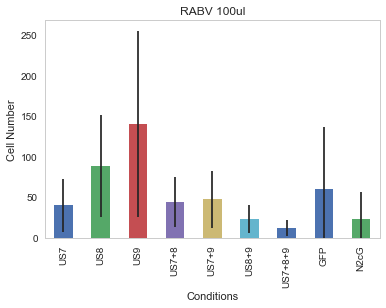

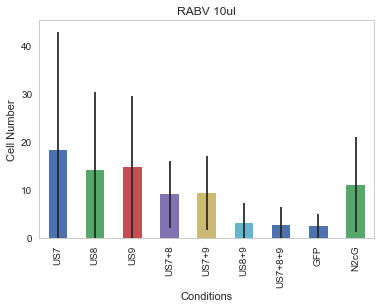

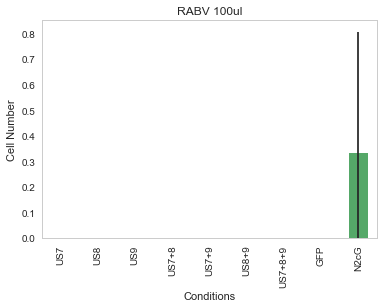

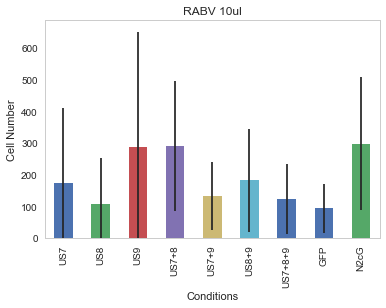

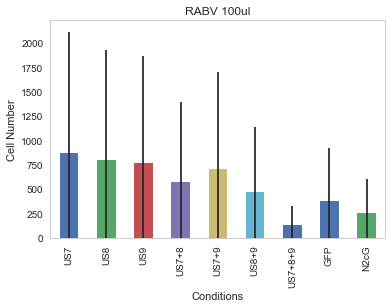

In [318]:
start = time.time()

for p in range(len(days)):
    ## select folder of interest
    image_folder = folder_loc  +'/'+ experiment +'/'+ virus +'/'+ 'ST_' + month + days[p] + file_type + virus + '_' + experiment_type
    ## folder to which results will be saved
    result_fol_step_1 = folder_loc +'/' + experiment +'/' + 'results' + '/'
    result_fol_step_2 = result_fol_step_1 + virus +'/'
    result_fol_step_3 = result_fol_step_2  + month + days[p] + file_type + virus + '_' + experiment_type +'/'
    print('working folder: {0} \nsaving to: {1}'.\
          format(image_folder,result_fol_step_3 ))
     #check if results folder exisits, else create it
    if not os.path.isdir(result_fol_step_1):
        print('results folder not found \ncreating...')
        os.mkdir(result_fol_step_1)
    if not os.path.isdir(result_fol_step_2):
        print('results folder not found \ncreating...')
        os.mkdir(result_fol_step_2)
    if not os.path.isdir(result_fol_step_3):
        print('results folder not found \ncreating...')
        os.mkdir(result_fol_step_3)
    
    result_folder = result_fol_step_3
    
          ## file extension
    extension = '*RFP.tif'
    # extension = '*.jpeg'
    file_paths = glob(image_folder +'/'+ extension)
    #print(file_paths)
    file_num = len(file_paths)
    print('number of images to process: {0}'.format(file_num))
    # do you want to save the results (or are you debugging?)
    saving = False  
        
    C = mcd()
    ### this next part of the code reload the module
    # if you edit the MyCellDetector.py script
    # rerun the next three lines to reload the new module
    rload(mcd)
   
    
    frames = C.read_files(image_folder, extension)
    
    #time
    grays = C.gray_frames(frames)
    blurs = C.blur_frames(grays, kernel = (3,3), filterType = 'median')
    
    perc= 99
    pVal_l = C.get_percentile(blurs[0], perc = perc)
    print('{0}th percentile: {1}'.format(perc, pVal_l))
    ## decide on lower and upper threshold of cells
    pVal_l = 5
    pVal_u = 255
    
        ## create C.params with default parameters
    C.define_parameters();
    ## adjust parameters manually if necessary
    C.params.minThreshold = pVal_l
    C.params.maxThreshold = pVal_u
    C.params.blobColor = 255
    C.params.minArea = 15
    C.params.minCircularity = 0.001
    C.params.minConvexity = 0.001
    C.params.minInertiaRatio = 0.001
 
        
    
    #### create detector with these parameters
    detector = C.create_detector(C.params)
    
    kptss = C.get_kyptss_w_detector(C.detector, blurs)
    pics = C.print_keypointss(kptss, frames)
    
    pics_ = []
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    text_loc               = (100,100)
    fontscale              = 2
    fontcolor              = (255,255,255)
    linetype               = 2
    
    image_name = []
    image_finder(file_paths, image_name)
    
    image_labeller(image_name, kptss, pics, result_fol_step_3) 
    
    ## all the folder paths
    #folder_names = ['./example','./images','./20180321']       
        ## create new dataframe
    cols = ['condition','frame','row','group', 'cells', 'path']
    X = pd.DataFrame(columns=cols)
    for i, image_path in enumerate(file_paths):
        row, exp, im = get_exp_params(image_path)
        if row in group1:
            gr = 0
        else:
            gr = 1
    #     print('detected:  exp: {0},  row: {1},  pic:{2}'.\
    #           format(exp, row, im))
        ## number of detected cells
        n = float(len(kptss[i]))
        #create temporary database
        x2 = pd.DataFrame([[exp, im,row,gr, n, image_path]], columns=cols);
        X = X.append(x2, ignore_index=True)
        
        
    x =  X.groupby(['condition', 'row', 'group'], as_index=False).sum().rename(columns = {'cells': 'wellsum'})
    

    x2  = x.groupby(['condition', 'group'], as_index=False).agg({'wellsum': \
            {'mean':'mean', 'std':lambda x: np.std(x),'range':lambda x: max(x) - min(x) ,'sum':'sum'}}) 

    
    #x2.head()
    
    x2.columns = [''.join(col).strip() for col in x2.columns.values]
    
    x2_sort = x2.sort_values('group')
    group_sort0 = x2_sort[0:9].sort_values('condition')
    print(group_sort0)
    group_sort1 = x2_sort[9:19].sort_values('condition')
        
    
    #x2.plot.bar(x='condition', y='wellsum', subplots=True, yerr='std',grid=False)
    #pl.savefig('./images_results/test.png')
    
    
    group_sort0.plot.bar(x='condition', y='wellsummean', subplots=True, yerr='wellsumstd',grid=False, legend = False)
    
    pl.title('RABV 10ul')
    pl.ylabel('Cell Number')
    pl.xlabel('Conditions')
    pl.xticks(np.arange(9), (condition_list))
    pl.savefig(result_folder+ '/'  + month + days[p] + '_' + '10ul RABV')
    pl.ylim(ymin = 0)
    
    
    group_sort1.plot.bar(x='condition', y='wellsummean', subplots=True, yerr='wellsumstd',grid=False, legend = False)
    
    pl.title('RABV 100ul')
    pl.ylabel('Cell Number')
    pl.xlabel('Conditions')
    pl.xticks(np.arange(9), (condition_list))
    pl.savefig(result_folder + '/' + month + days[p] + '_' + '100ul RABV')
    pl.ylim(ymin = 0)
    

    
    
    
    pl.plot()
    
        ## create csv file
    results_filename = result_folder+'/'+ month + days[p] + 'summary_results.csv'
    x2.to_csv(results_filename, encoding='utf-8', index=True)
    
    ## create csv file
    results_filename = result_folder+'/'+ month + days[p] +  'results_database.csv'
    X.to_csv(results_filename, encoding='utf-8', index=True)

end = time.time()
print(end - start)



9980.893874168396


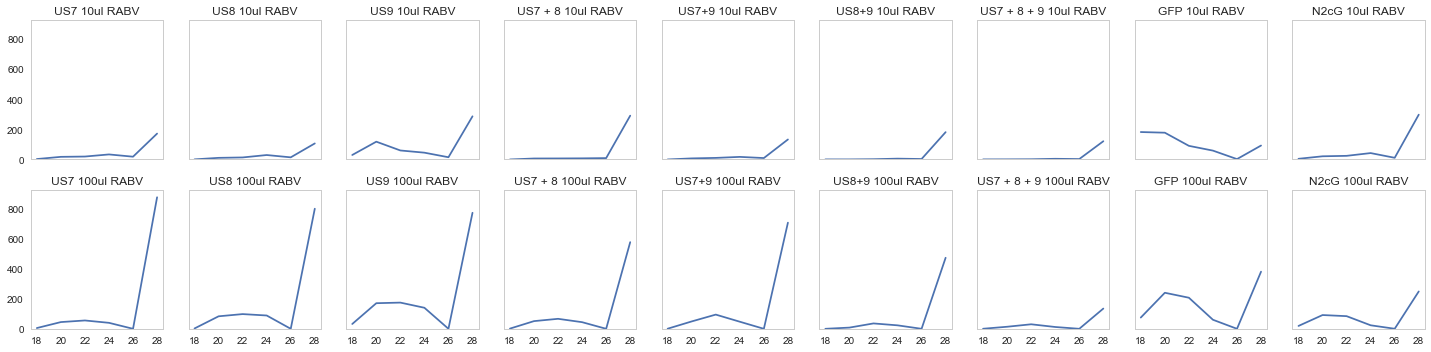

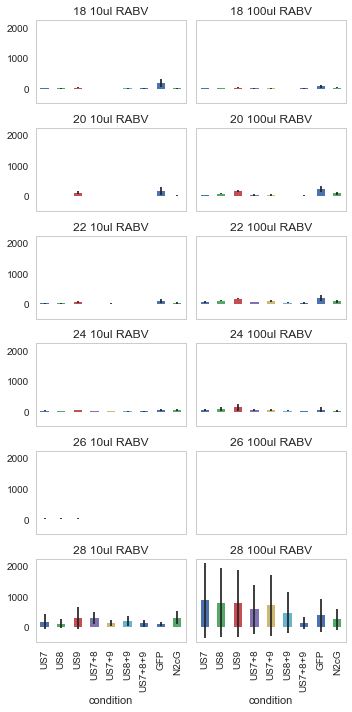

In [325]:
csv_directory = 'C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_1_Mar2018/results/' + virus +'/'
csv_extension = '*summary_results.csv'

csv_step_1 = glob(csv_directory + '/' + '*' +'/')
#print(csv_step_1)

csv_directory_list = [0]*len(csv_step_1)

csv_finder(csv_directory, csv_extension)

US7_10 = [0]*len(days)
US8_10 = [0]*len(days)
US9_10 = [0]*len(days)
US7_8_10 = [0]*len(days)
US7_9_10 = [0]*len(days)
US8_9_10 = [0]*len(days)
US7_8_9_10 =[0]*len(days)
GFP_10 = [0]*len(days)
N2cG_10 = [0]*len(days)

condition_10 = [US7_10, US8_10, US9_10, US7_8_10, US7_9_10, US8_9_10, US7_8_9_10, GFP_10, N2cG_10]


for i11 in range(len(condition_10)):
    for i10 in range(len(csv_directory_list)):
        csv_step_10_1 = pd.read_csv(csv_directory_list[i10])
        csv_step_10_2 = csv_step_10_1.sort_values('group')
        csv_step_10_3 = csv_step_10_2[0:9].sort_values('condition')
        condition_10[i11][i10] = (csv_step_10_3.iloc[i11, 3])
        
US7_100 = [0]*len(days)
US8_100 = [0]*len(days)
US9_100 = [0]*len(days)
US7_8_100 = [0]*len(days)
US7_9_100 = [0]*len(days)
US8_9_100 = [0]*len(days)
US7_8_9_100 =[0]*len(days)
GFP_100 = [0]*len(days)
N2cG_100 = [0]*len(days)


condition_100 = [US7_100,US8_100,US9_100,US7_8_100,US7_9_100,US8_9_100,US7_8_9_100, GFP_100,N2cG_100]

        
for i13 in range(len(condition_100)):
    for i12 in range(len(csv_directory_list)):
        csv_step_100_1 = pd.read_csv(csv_directory_list[i12])
        csv_step_100_2 = csv_step_100_1.sort_values('group')
        csv_step_100_3 = csv_step_100_2[9:18].sort_values('condition')
        condition_100[i13][i12] = (csv_step_100_3.iloc[i13, 3])


dataframe_10 = pd.DataFrame(condition_10, columns = days)
dataframe_100 = pd.DataFrame(condition_100, columns = days)

dataframe_10t = pd.DataFrame.transpose(dataframe_10)
dataframe_100t = pd.DataFrame.transpose(dataframe_100)

##find ymax
ymax_100 = dataframe_100.values.max()
ymax_10 = dataframe_10.values.max()
ymax_total = max([ymax_100, ymax_10])


title_list = ['US7', 'US8', 'US9', 'US7 + 8', 'US7+9', 'US8+9', 'US7 + 8 + 9', 'GFP', 'N2cG']

fig, axes = pl.subplots(nrows = 2, ncols = 9, figsize = (20, 5), sharey = True, sharex = True)
#ax.set_title('10ul and 100ul Comparison')

for i20 in range(len(condition_10)):
    x = dataframe_10t.plot.line(y = i20, ylim = [0,ymax_total + 50], sharey = True, legend = False, ax = axes[0,i20], title = title_list[i20] + ' 10ul RABV')
    pl.xticks(np.arange(len(days)), (days))

    
for i21 in range(len(condition_100)):
    x = dataframe_100t.plot.line(y = i21, ylim = [0, ymax_total + 50], sharey = True, legend = False, ax = axes[1, i21], title = title_list[i21] + ' 100ul RABV')
    pl.xticks(np.arange(len(days)), (days))


fig.tight_layout()
pl.savefig('C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_1_Mar2018/results/Comparison_line' + virus + '.png')

fig, axes = pl.subplots(nrows = 6, ncols = 2, figsize = (5, 10), sharey = True, sharex = True)
#axes.set_title('10ul and 100ul Comparison')

pl.xticks(np.arange(9), (condition_list))

#####

for i21 in range(len(csv_directory_list)):
    csv_barstep_10_1 = pd.read_csv(csv_directory_list[i21])
    csv_barstep_10_2 = csv_barstep_10_1.sort_values('group')
    csv_barstep_10_3 = csv_barstep_10_2[0:9].sort_values('condition')
    csv_barstep_10_3.plot.bar(x='condition', y='wellsummean', yerr = 'wellsumstd', grid=False, title = days[i21] + ' 10ul RABV',ax = axes[i21,0], legend = False)
    pl.xticks(np.arange(9), (condition_list))

    

    
    
    
for i23 in range(len(csv_directory_list)):
    csv_barstep_100_1 = pd.read_csv(csv_directory_list[i23])
    csv_barstep_100_2 = csv_barstep_100_1.sort_values('group')
    csv_barstep_100_3 = csv_barstep_100_2[9:18].sort_values('condition')
    csv_barstep_100_3.plot.bar(x='condition', y='wellsummean', yerr = 'wellsumstd', grid=False, title = days[i23] + ' 100ul RABV',ax = axes[i23, 1], legend = False)

    pl.xticks(np.arange(9), (condition_list))


    
fig.tight_layout()
#fig.text (0.6, 0.18, 'Conditions', ha = 'center', va = 'center')
pl.xticks(np.arange(9), (condition_list))
#pl.subplots_adjust(bottom=.25, left=.25)

pl.show

pl.savefig('C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_1_Mar2018/results/Comparison_bar_' + virus + '.png')

end = time.time()
print(end - start)

In [323]:
dataframe_100

,18,20,22,24,26,28
0,5.000000,44.666667,55.333333,39.666667,0.000000,873.333333
1,2.333333,83.000000,97.666667,88.333333,0.000000,797.333333
2,32.000000,170.000000,174.000000,139.666667,0.000000,770.333333
3,1.333333,51.000000,66.333333,44.000000,0.000000,575.333333
4,0.666667,49.000000,94.333333,47.000000,0.000000,704.666667
5,0.000000,8.000000,35.666667,23.000000,0.000000,471.666667
6,0.333333,13.666667,30.000000,12.000000,0.000000,134.333333
7,74.666667,239.333333,206.333333,60.000000,0.000000,379.333333
8,19.000000,91.333333,84.000000,23.333333,0.333333,248.000000


In [324]:
dataframe_10

,18,20,22,24,26,28
0,2.666667,17.333333,19.333333,33.333333,18.333333,171.666667
1,0.666667,10.666667,13.333333,29.333333,14.000000,106.333333
2,29.666667,118.000000,59.666667,45.000000,14.666667,286.333333
3,0.000000,6.333333,6.666667,7.333333,9.000000,290.666667
4,0.000000,7.000000,10.333333,17.000000,9.333333,132.666667
5,0.333333,0.333333,1.666667,5.333333,3.000000,181.333333
6,0.333333,0.666667,1.333333,4.333333,2.666667,121.000000
7,182.000000,177.666667,90.333333,58.666667,2.333333,92.333333
8,4.333333,21.000000,24.000000,42.333333,11.000000,297.333333
